In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



### Split and Scale Section

In [3]:
df=pd.read_csv('Processed_telco_customer.csv')

In [4]:
df.head(5)

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,zone_id
0,1,0,0,0,2,1,0,0,2,2,...,0,0,1,3,53.85,108.15,1,86,3239,1
1,0,0,0,1,2,1,0,1,0,0,...,0,0,1,2,70.70,151.65,1,67,2701,1
2,0,0,0,1,8,1,2,1,0,0,...,2,0,1,2,99.65,820.50,1,86,5372,1
3,0,0,1,1,28,1,2,1,0,0,...,2,0,1,2,104.80,3046.05,1,84,5003,1
4,1,0,0,1,49,1,2,1,0,2,...,2,0,1,0,103.70,5036.30,1,89,5340,1


First we initializing the `Features (X) and Target Label (y)`. We will simply drop Churn value and Churn Score from df. Later on, we will check if we need to drop `Churn Score` and `CLTV`.

In [5]:
X=df.drop(['Churn Value'],axis=1)
y=df['Churn Value']

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=101,test_size=0.2)

In [7]:
X_train.head(5)

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Score,CLTV,zone_id
850,0,0,1,0,34,1,2,1,0,0,...,2,0,0,0,2,87.45,2874.15,98,3358,2
2122,0,0,1,1,66,1,2,0,2,2,...,0,0,0,1,0,67.45,4508.65,26,4172,4
596,0,1,0,0,3,1,0,1,0,0,...,2,0,0,1,2,86.85,220.95,70,3561,1
206,1,1,1,0,7,1,2,1,0,0,...,2,2,0,1,0,95.60,644.35,83,3265,3
5006,1,0,0,0,57,1,0,0,0,2,...,0,0,1,1,3,54.65,3134.70,58,4223,0


In [8]:
scaler=StandardScaler()

In [9]:
X_train_scaled = scaler.fit_transform(X_train)

In [10]:
X_test_scaled = scaler.transform(X_test)

In [11]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Score,CLTV,zone_id
0,-1.017758,-0.439895,1.036395,-0.544958,0.053581,0.329203,1.114487,0.182828,-0.918411,-1.025076,...,1.152061,-1.109807,-0.829318,-1.210348,0.397831,0.754806,0.250303,1.836832,-0.886838,0.399620
1,-1.017758,-0.439895,1.036395,1.835003,1.353222,0.329203,1.114487,-1.173907,1.401330,1.243238,...,-1.103541,-1.109807,-0.829318,0.826208,-1.481092,0.088563,0.967969,-1.527603,-0.195740,1.835036
2,-1.017758,2.273271,-0.964883,-0.544958,-1.205446,0.329203,-0.994863,0.182828,-0.918411,-1.025076,...,1.152061,-1.109807,-0.829318,0.826208,0.397831,0.734818,-0.914646,0.528441,-0.714488,-0.318088
3,0.982552,2.273271,1.036395,-0.544958,-1.042991,0.329203,1.114487,0.182828,-0.918411,-1.025076,...,1.152061,1.145490,-0.829318,0.826208,-1.481092,1.026299,-0.728743,1.135908,-0.965796,1.117328
4,0.982552,-0.439895,-0.964883,-0.544958,0.987698,0.329203,-0.994863,-1.173907,-0.918411,1.243238,...,-1.103541,-1.109807,0.371123,0.826208,1.337292,-0.337832,0.364704,-0.032299,-0.152440,-1.035796


In [12]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_test_scaled.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Score,CLTV,zone_id
0,0.982552,-0.439895,1.036395,-0.544958,-1.205446,-3.037643,0.059812,-1.173907,-0.918411,1.243238,...,-1.103541,-1.109807,-0.829318,-1.210348,-0.541631,-1.165638,-0.970211,-1.247234,1.028540,0.399620
1,-1.017758,-0.439895,1.036395,-0.544958,1.109539,0.329203,1.114487,0.182828,-0.918411,1.243238,...,1.152061,1.145490,-0.829318,0.826208,0.397831,1.166210,1.616524,-0.966864,1.537099,-1.035796
2,0.982552,2.273271,1.036395,-0.544958,-0.799308,0.329203,-0.994863,0.182828,-0.918411,1.243238,...,1.152061,1.145490,-0.829318,0.826208,0.397831,1.106248,-0.468153,1.883560,-0.584588,-1.035796
3,0.982552,-0.439895,1.036395,1.835003,-0.555625,0.329203,-0.994863,1.539562,0.241459,0.109081,...,0.024260,0.017842,1.571564,-1.210348,1.337292,-1.485435,-0.841562,0.061158,0.355271,-1.035796
4,-1.017758,-0.439895,1.036395,1.835003,0.906471,0.329203,-0.994863,-1.173907,1.401330,1.243238,...,-1.103541,-1.109807,-0.829318,-1.210348,0.397831,-0.302854,0.363430,0.107886,-0.215267,-0.318088


### Model 1: Logistic Regression without Scaling

First we won't use scaled split in logistic regression.

In [13]:
model_LR=LogisticRegression()

In [14]:
model_LR.fit(X_train,y_train)

c:\Users\gokal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
y_pred_probs_LR=model_LR.predict(X_test)

In [16]:
y_pred_LR = (y_pred_probs_LR > 0.5).astype(int)

In [17]:
import joblib

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [19]:
classification_report_LR=classification_report(y_pred_LR,y_test)
accuracy_score_LR=accuracy_score(y_pred_LR,y_test)
confusion_matrix_LR=confusion_matrix(y_pred_LR,y_test)

In [20]:
print(classification_report_LR)

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1002
           1       0.83      0.79      0.81       405

    accuracy                           0.89      1407
   macro avg       0.87      0.86      0.87      1407
weighted avg       0.89      0.89      0.89      1407



In [21]:
accuracy_score_LR

0.892679459843639

<Axes: >

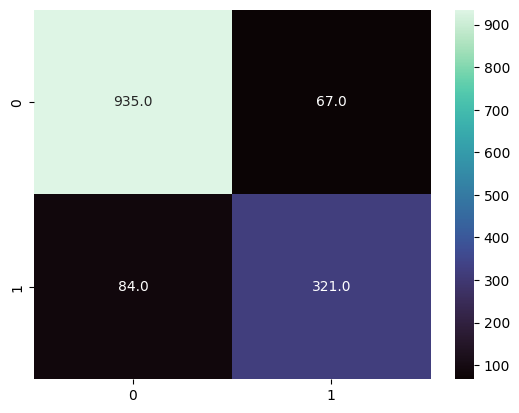

In [22]:
sns.heatmap(confusion_matrix_LR,annot=True,cmap='mako',fmt='0.1f')

In [23]:
joblib.dump(model_LR, "models/logreg_no_scaling.pkl")

['models/logreg_no_scaling.pkl']



### Model 2: Logistic Regression with Scaling and GridSearch
Model 2: We will do it with `GridSearch` to find best parameters, and this time we will use `scaled version` of our input data.  

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
LR_params = {
    'C': [0.01, 0.1, 1, 10],              
    'penalty': ['l2', 'elasticnet'],     
    'solver': ['saga'],                     
    'l1_ratio': [0, 0.5, 1]                
}

In [26]:
model_scaled_LR=LogisticRegression(max_iter=1000, random_state=42)

In [27]:
grid_search = GridSearchCV(
    estimator=model_scaled_LR,
    param_grid=LR_params,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

In [28]:
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


c:\Users\gokal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'l1_ratio': [0, 0.5, 1],
                         'penalty': ['l2', 'elasticnet'], 'solver': ['saga']},
             scoring='accuracy', verbose=1)

In [29]:
grid_search.best_params_

{'C': 0.1, 'l1_ratio': 0, 'penalty': 'l2', 'solver': 'saga'}

In [30]:
grid_search.best_score_

0.9184000000000001

In [31]:
model_scaled_LR_best=grid_search.best_estimator_

In [32]:
y_pred_scaled_LR = model_scaled_LR_best.predict(X_test_scaled)

In [33]:
classification_report_scaled_LR = classification_report(y_test, y_pred_scaled_LR)
accuracy_score_scaled_LR = accuracy_score(y_test, y_pred_scaled_LR)
confusion_matrix_scaled_LR = confusion_matrix(y_test, y_pred_scaled_LR)


In [34]:
print(classification_report_scaled_LR)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1019
           1       0.86      0.88      0.87       388

    accuracy                           0.93      1407
   macro avg       0.90      0.91      0.91      1407
weighted avg       0.93      0.93      0.93      1407



In [35]:
accuracy_score_scaled_LR

0.9253731343283582

<Axes: >

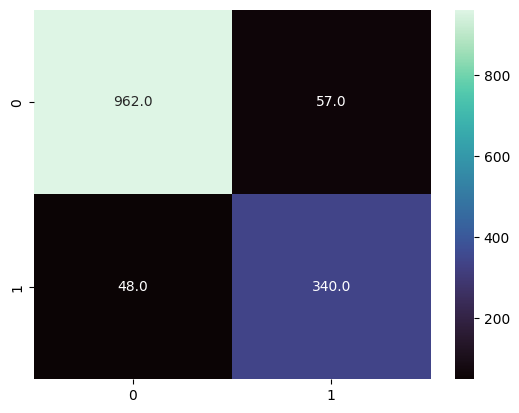

In [36]:
sns.heatmap(confusion_matrix_scaled_LR,annot=True,cmap='mako',fmt='0.1f')

In [37]:
joblib.dump(model_scaled_LR_best, "models/logreg_scaled_gridsearch.pkl")

['models/logreg_scaled_gridsearch.pkl']

### Model 3: Basic Neural Network With PyTorch

First, we trained a `logistic regression model` `without scaling` and `without grid search`. The accuracy was `89%`, and the model had lower performance when predicting customers who churn (class 1). Then, we trained the `same model` with `scaled data` and used `GridSearchCV` to find the best parameters. This improved the accuracy to `93%`, and the model became much better at detecting churned customers.

Now, the third model will be the "Basic Neural Network". We will implement this NN with PyTorch. After that, results will show that if this project needs complicated model or not.

In [38]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, TensorDataset

import torch.nn.functional as F


In [39]:
X_train_tensor = torch.tensor(X_train_scaled.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test_scaled.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [40]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

In [41]:

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128)

In [42]:
class ChurnClassifier(nn.Module):
    def __init__(self, n_features: int, n_classes: int):
        super().__init__()
        self.fc1 = nn.Linear(n_features, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 16)
        self.output = nn.Linear(16, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = torch.sigmoid(self.output(x)) 
        return x


In [43]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [44]:
n_features = X_train_scaled.shape[1]

In [45]:
ANN_model = ChurnClassifier(n_features=n_features,n_classes=2).to(device)


In [46]:
loss_f=nn.BCELoss()

In [47]:
optimizer=torch.optim.Adam(ANN_model.parameters(),lr=0.001)

In [48]:
epochs= 64

for epoch in range(epochs):
    ANN_model.train()
    epoch_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        y_pred = ANN_model(X_batch)
        loss = loss_f(y_pred, y_batch)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss/len(train_loader):.4f}")


Epoch 1/64, Loss: 0.5429
Epoch 2/64, Loss: 0.3097
Epoch 3/64, Loss: 0.2202
Epoch 4/64, Loss: 0.1843
Epoch 5/64, Loss: 0.1774
Epoch 6/64, Loss: 0.1732
Epoch 7/64, Loss: 0.1681
Epoch 8/64, Loss: 0.1654
Epoch 9/64, Loss: 0.1622
Epoch 10/64, Loss: 0.1575
Epoch 11/64, Loss: 0.1592
Epoch 12/64, Loss: 0.1550
Epoch 13/64, Loss: 0.1515
Epoch 14/64, Loss: 0.1494
Epoch 15/64, Loss: 0.1485
Epoch 16/64, Loss: 0.1437
Epoch 17/64, Loss: 0.1413
Epoch 18/64, Loss: 0.1388
Epoch 19/64, Loss: 0.1339
Epoch 20/64, Loss: 0.1315
Epoch 21/64, Loss: 0.1291
Epoch 22/64, Loss: 0.1312
Epoch 23/64, Loss: 0.1249
Epoch 24/64, Loss: 0.1221
Epoch 25/64, Loss: 0.1193
Epoch 26/64, Loss: 0.1159
Epoch 27/64, Loss: 0.1101
Epoch 28/64, Loss: 0.1111
Epoch 29/64, Loss: 0.1084
Epoch 30/64, Loss: 0.1066
Epoch 31/64, Loss: 0.0994
Epoch 32/64, Loss: 0.0976
Epoch 33/64, Loss: 0.0942
Epoch 34/64, Loss: 0.0894
Epoch 35/64, Loss: 0.0858
Epoch 36/64, Loss: 0.0834
Epoch 37/64, Loss: 0.0756
Epoch 38/64, Loss: 0.0758
Epoch 39/64, Loss: 0.

In [49]:
ANN_model.eval()
with torch.no_grad():
    y_preds = []
    y_true = []
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        preds = ANN_model(X_batch)
        y_preds.extend(preds.cpu().numpy())
        y_true.extend(y_batch.numpy())

y_pred_class = (np.array(y_preds) > 0.5).astype(int)


In [59]:
accuracy_score_ANN = accuracy_score(y_test, y_pred_class)
classification_report_ANN = classification_report(y_test, y_pred_class,output_dict=True)

In [51]:
accuracy_score_ANN

0.8841506751954513

In [58]:
print(classification_report_ANN)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1019
           1       0.79      0.79      0.79       388

    accuracy                           0.88      1407
   macro avg       0.85      0.86      0.86      1407
weighted avg       0.88      0.88      0.88      1407



<Axes: >

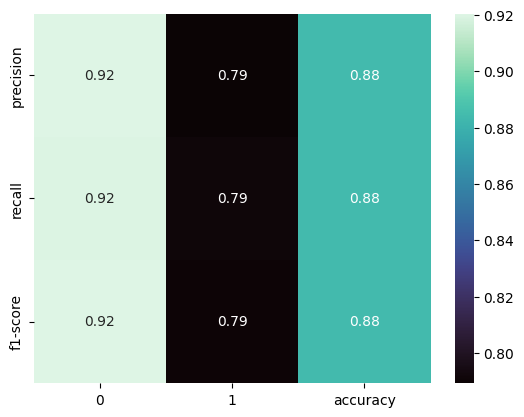

In [61]:
sns.heatmap(pd.DataFrame(classification_report_ANN).iloc[:-1, :3], annot=True, cmap="mako")

In [ ]:
torch.save(ANN_model.state_dict(), "models/ann_basic.pth")


### Model 4: Logistic Regression (Scaled) with Dropped Churn Score

We clearly see that we don't need complex models to predict whether a customer will churn or not. This time, we will drop `Churn Score` and try again with the same models.

In [ ]:
X=df.drop(['Churn Value','Churn Score'],axis=1)
y=df['Churn Value']

In [ ]:
X_train_2,X_test_2,y_train_2,y_test_2=train_test_split(X,y,random_state=105,test_size=0.2)

In [ ]:
scaler=StandardScaler()


In [ ]:
X_train_2 = scaler.fit_transform(X_train_2)
X_test_2 = scaler.transform(X_test_2)


In [ ]:
model_scaled_LR.fit(X_train_2,y_train_2)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
preds2=model_scaled_LR.predict(X_test_2)

In [ ]:
y_pred_LR_2 = (preds2 > 0.5).astype(int)

In [ ]:
accuracy_score(y_pred_LR_2,y_test_2)

0.8045486851457001

In [ ]:
confusion_matrix_dropped=confusion_matrix(y_pred_LR_2,y_test_2)

In [ ]:
print(confusion_matrix_dropped)

[[915 159]
 [116 217]]


In [ ]:
classification_report_dropped=classification_report(y_pred_LR_2,y_test_2)

In [ ]:
print(classification_report_dropped)

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1074
           1       0.58      0.65      0.61       333

    accuracy                           0.80      1407
   macro avg       0.73      0.75      0.74      1407
weighted avg       0.81      0.80      0.81      1407



<Axes: >

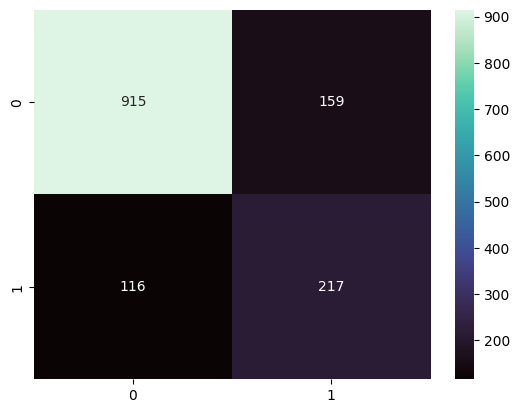

In [ ]:
sns.heatmap(confusion_matrix_dropped,annot=True,cmap='mako',fmt='0.0f')

In [ ]:
import joblib

joblib.dump(model_scaled_LR, "models/logreg_scaled_dropped.pkl")


['models/logreg_scaled_dropped.pkl']

### Model 5: Complex Neural Network (with Dropped Churn Score)

`Churn Score` Value holds considerably good amount of information. Accuracy drooped to %80 which nearly %10. We will implement more complex neural network with dropping the `Churn Score` value.

In [ ]:
class ChurnClassifier2(nn.Module):
    def __init__(self,n_features,n_classes):
        super().__init__()
        self.fc1=nn.Linear(21,256)
        self.bn1=nn.BatchNorm1d(256)
        self.drop1=nn.Dropout1d(0.3)
        self.fc2=nn.Linear(256,128)
        self.drop2=nn.Dropout1d(0.3)
        self.fc3=nn.Linear(128,64)
        self.fc4=nn.Linear(64,32)
        self.drop3=nn.Dropout1d(0.3)
        self.fc5=nn.Linear(32,16)
        self.fc6=nn.Linear(16,1)

    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = self.bn1(x)
        x = self.drop1(x)
        x = F.relu(self.fc2(x))
        x = self.drop2(x)
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.drop3(x)
        x = F.relu(self.fc5(x))
        x = torch.sigmoid(self.fc6(x))
        return x

In [ ]:
ANN_model_2 = ChurnClassifier2(n_features=22,n_classes=2).to(device)


In [ ]:
n_epochs=32

In [ ]:
X_train_tensor_2 = torch.tensor(X_train_2, dtype=torch.float32)
y_train_tensor_2 = torch.tensor(y_train_2.values, dtype=torch.float32).view(-1, 1)
X_test_tensor_2 = torch.tensor(X_test_2, dtype=torch.float32)
y_test_tensor_2 = torch.tensor(y_test_2.values, dtype=torch.float32).view(-1, 1)


In [ ]:
train_dataset_2 = TensorDataset(X_train_tensor_2, y_train_tensor_2)
test_dataset_2 = TensorDataset(X_test_tensor_2, y_test_tensor_2)

In [ ]:
train_loader_2 = DataLoader(train_dataset_2, batch_size=128, shuffle=True)
test_loader_2 = DataLoader(test_dataset_2, batch_size=128)

In [ ]:
loss_f=nn.BCELoss()

In [ ]:
optimizer=torch.optim.Adam(ANN_model_2.parameters(),lr=0.001)

In [ ]:
epochs= 64

for epoch in range(epochs):
    ANN_model_2.train()
    epoch_loss = 0
    for X_batch, y_batch in train_loader_2:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        y_pred = ANN_model_2(X_batch)
        loss = loss_f(y_pred, y_batch)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss/len(train_loader_2):.4f}")


Epoch 1/64, Loss: 0.6393
Epoch 2/64, Loss: 0.5871
Epoch 3/64, Loss: 0.5568
Epoch 4/64, Loss: 0.5412
Epoch 5/64, Loss: 0.5350
Epoch 6/64, Loss: 0.5212
Epoch 7/64, Loss: 0.5260
Epoch 8/64, Loss: 0.5171
Epoch 9/64, Loss: 0.5179
Epoch 10/64, Loss: 0.5125
Epoch 11/64, Loss: 0.5056
Epoch 12/64, Loss: 0.5052
Epoch 13/64, Loss: 0.5074
Epoch 14/64, Loss: 0.5030
Epoch 15/64, Loss: 0.5045
Epoch 16/64, Loss: 0.5043
Epoch 17/64, Loss: 0.5008
Epoch 18/64, Loss: 0.4969
Epoch 19/64, Loss: 0.5036
Epoch 20/64, Loss: 0.4929
Epoch 21/64, Loss: 0.4945
Epoch 22/64, Loss: 0.4956
Epoch 23/64, Loss: 0.4884
Epoch 24/64, Loss: 0.4873
Epoch 25/64, Loss: 0.4806
Epoch 26/64, Loss: 0.4870
Epoch 27/64, Loss: 0.4832
Epoch 28/64, Loss: 0.4802
Epoch 29/64, Loss: 0.4837
Epoch 30/64, Loss: 0.4821
Epoch 31/64, Loss: 0.4791
Epoch 32/64, Loss: 0.4757
Epoch 33/64, Loss: 0.4746
Epoch 34/64, Loss: 0.4760
Epoch 35/64, Loss: 0.4688
Epoch 36/64, Loss: 0.4625
Epoch 37/64, Loss: 0.4687
Epoch 38/64, Loss: 0.4670
Epoch 39/64, Loss: 0.

In [ ]:
ANN_model_2.eval()
all_preds = []
all_labels = []

with torch.no_grad():  
    for X_batch, y_batch in test_loader_2:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        preds = ANN_model_2(X_batch)  
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(y_batch.cpu().numpy())


all_preds = np.array(all_preds)
y_pred_class = (all_preds > 0.5).astype(int)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Test Accuracy:", accuracy_score(all_labels, y_pred_class))
print("Classification Report:\n", classification_report(all_labels, y_pred_class))
print("Confusion Matrix:\n", confusion_matrix(all_labels, y_pred_class))

Test Accuracy: 0.759772565742715
Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.87      0.84      1031
         1.0       0.56      0.45      0.50       376

    accuracy                           0.76      1407
   macro avg       0.69      0.66      0.67      1407
weighted avg       0.75      0.76      0.75      1407

Confusion Matrix:
 [[899 132]
 [206 170]]


In [ ]:
torch.save(ANN_model_2.state_dict(), "models/ann_complex_dropped_churnscore.pth")


### Plotting and Evaluating the metrics of All Models

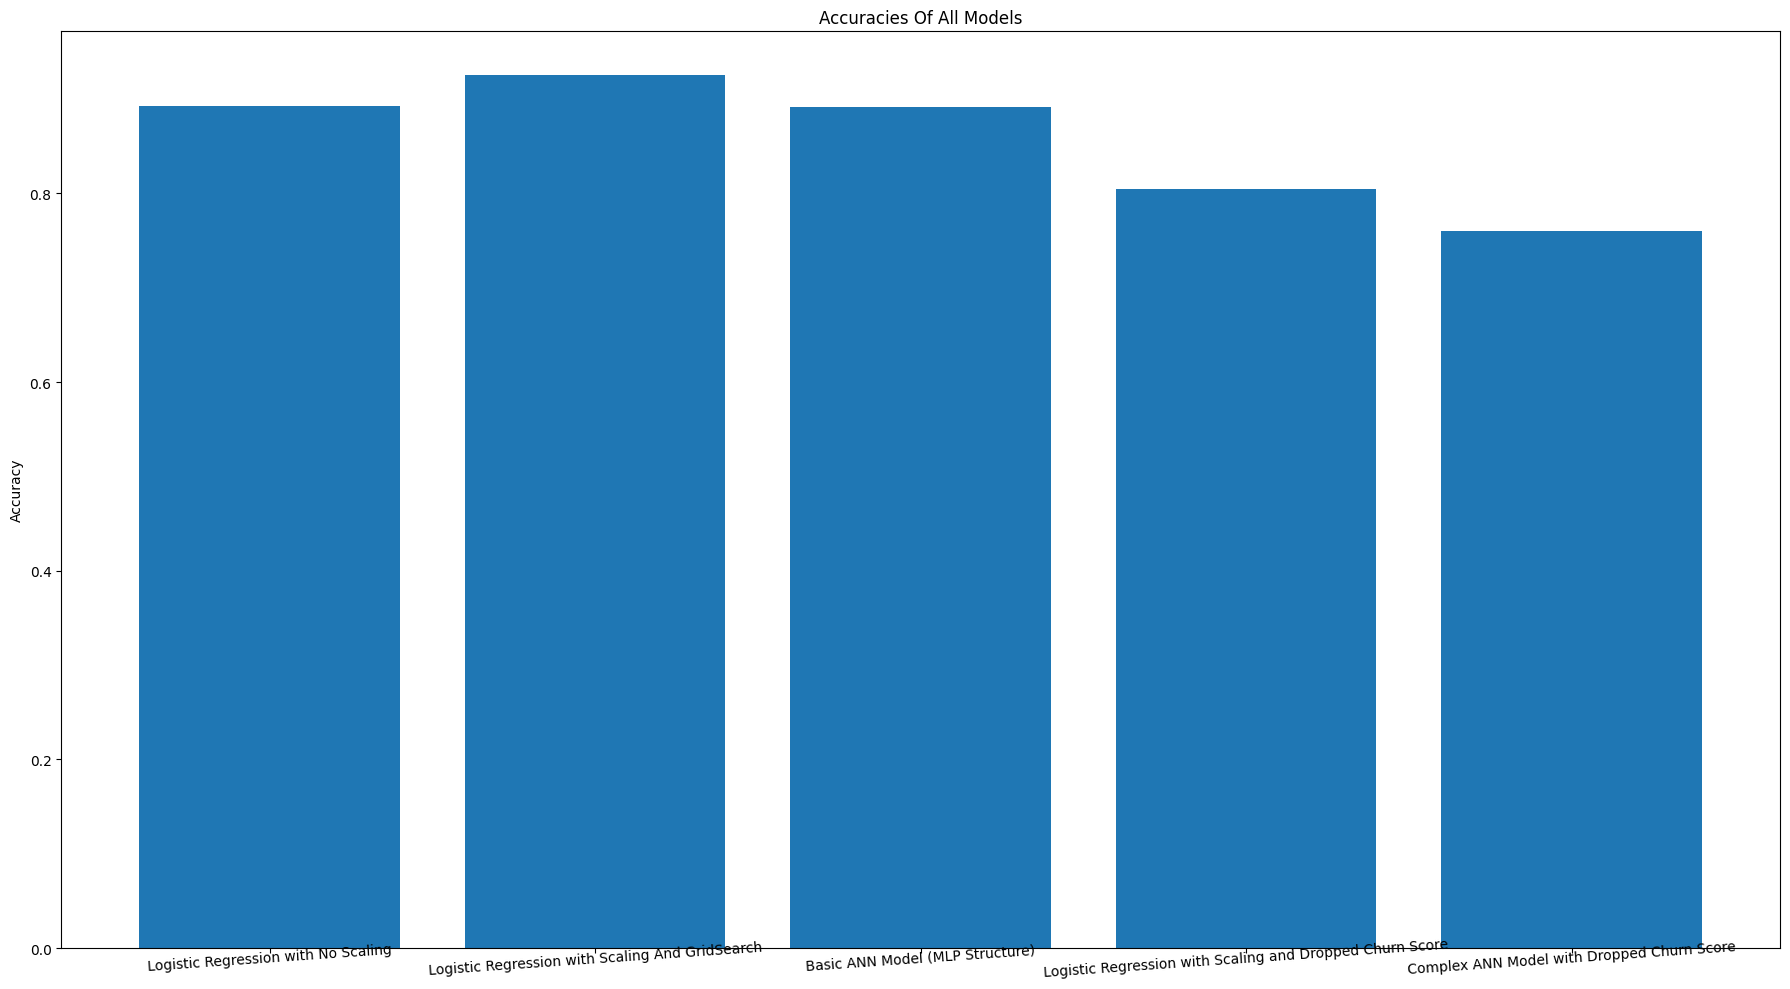

In [ ]:
model_names = [
    'Logistic Regression with No Scaling',
    'Logistic Regression with Scaling And GridSearch',
    'Basic ANN Model (MLP Structure)',
    'Logistic Regression with Scaling and Dropped Churn Score',
    'Complex ANN Model with Dropped Churn Score'
]

accuracies = [
    accuracy_score_LR,              
    accuracy_score_scaled_LR,        
    accuracy_score_ANN,              
    accuracy_score(y_pred_LR_2,y_test_2),   
    accuracy_score(all_labels, y_pred_class)  
]

plt.figure(figsize=(18,10))
bars = plt.bar(model_names, accuracies)
plt.title('Accuracies Of All Models')
plt.ylabel('Accuracy')
plt.xticks( ha='center', va='center', fontsize=10, rotation=4)


plt.tight_layout()
plt.show()


All Models performed well in terms of `Accuracy Score`. Dropping the `Churn Score` feature affected all of the models. We can see that Logistic Regression and Complex ANN model worked well with `Churn Score` feature, because when we drop the feature, LogReg and Complex ANN accuracy lowered. 

We named the variables again because we used same names before.

In [ ]:
from sklearn.metrics import f1_score,precision_score

In [ ]:
y_pred_ANN = y_pred_class_3 = (np.array(y_preds) > 0.5).astype(int)
y_test_ANN = y_test  

In [ ]:
y_pred_ANN_2 = y_pred_class_5 = (all_preds > 0.5).astype(int)
y_test_ANN_2 = all_labels 

For this plotting, we took help from Google and various sources.

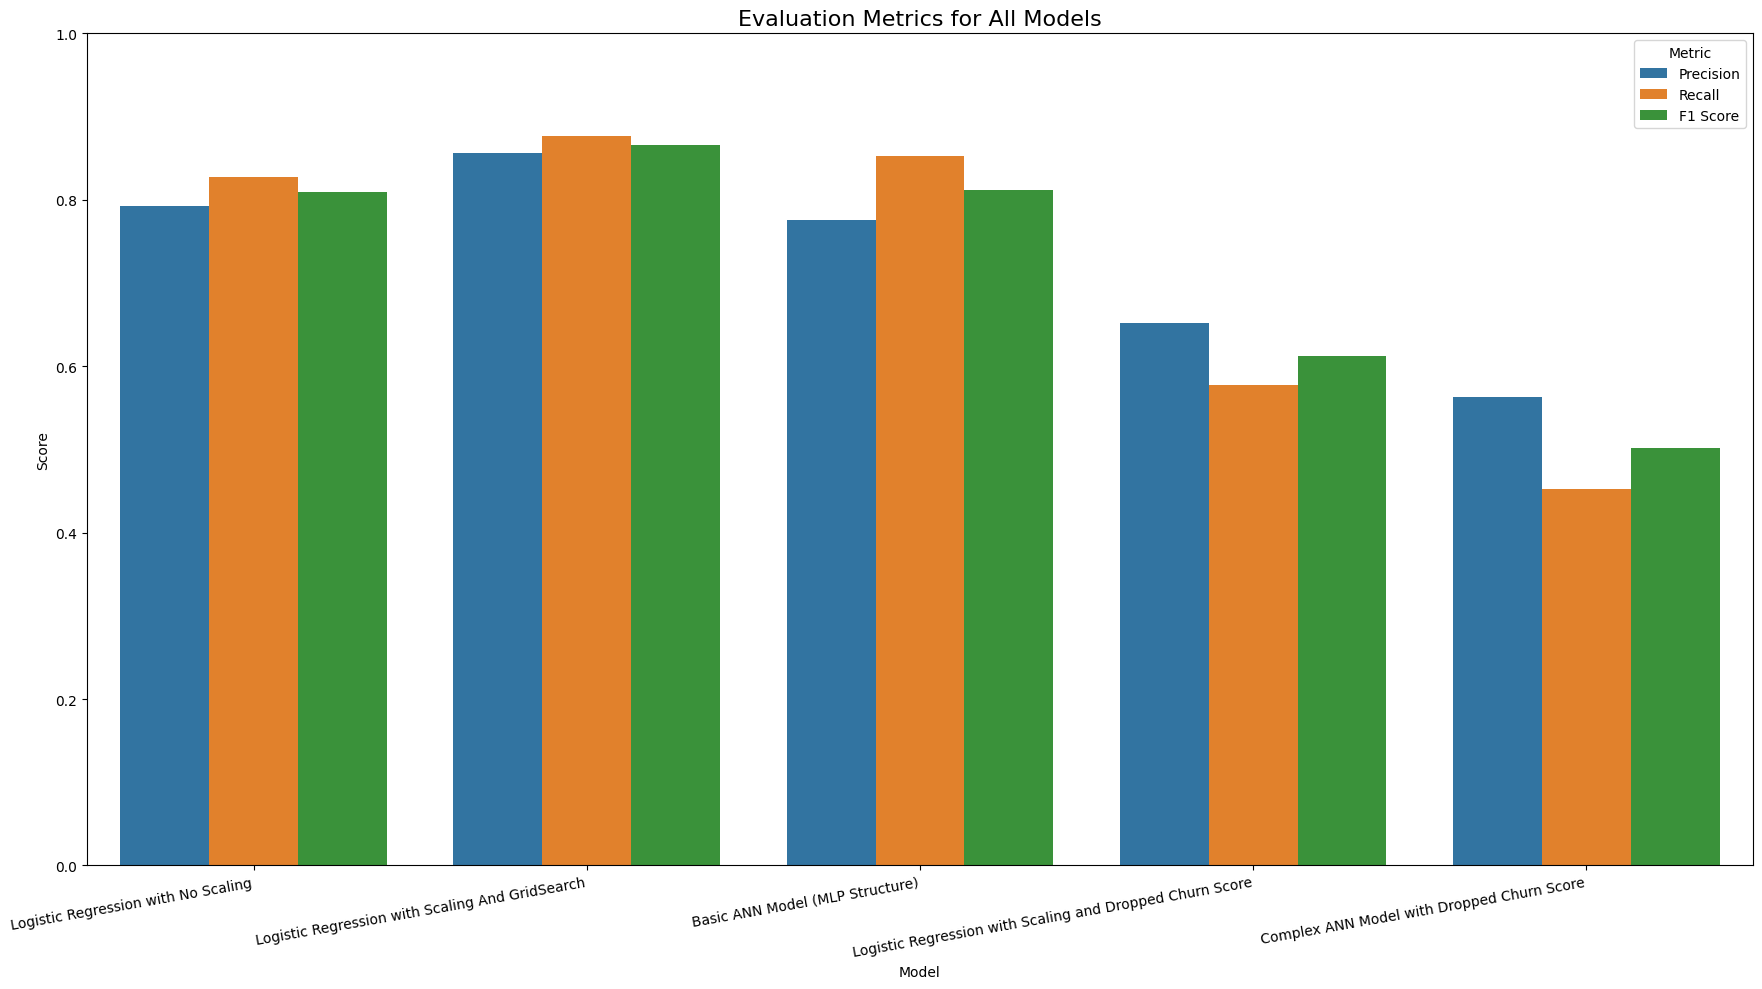

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score


model_names = [
    'Logistic Regression with No Scaling',
    'Logistic Regression with Scaling And GridSearch',
    'Basic ANN Model (MLP Structure)',
    'Logistic Regression with Scaling and Dropped Churn Score',
    'Complex ANN Model with Dropped Churn Score'
]


precisions = [
    precision_score(y_test, y_pred_LR),
    precision_score(y_test, y_pred_scaled_LR),
    precision_score(y_test_ANN, y_pred_ANN),
    precision_score(y_test_2, y_pred_LR_2),
    precision_score(y_test_ANN_2, y_pred_ANN_2)
]

recalls = [
    recall_score(y_test, y_pred_LR),
    recall_score(y_test, y_pred_scaled_LR),
    recall_score(y_test_ANN, y_pred_ANN),
    recall_score(y_test_2, y_pred_LR_2),
    recall_score(y_test_ANN_2, y_pred_ANN_2)
]

f1s = [
    f1_score(y_test, y_pred_LR),
    f1_score(y_test, y_pred_scaled_LR),
    f1_score(y_test_ANN, y_pred_ANN),
    f1_score(y_test_2, y_pred_LR_2),
    f1_score(y_test_ANN_2, y_pred_ANN_2)
]

df = pd.DataFrame({
    'Model': model_names * 3,
    'Metric': ['Precision'] * 5 + ['Recall'] * 5 + ['F1 Score'] * 5,
    'Score': precisions + recalls + f1s
})

plt.figure(figsize=(18, 10))
sns.barplot(x='Model', y='Score', hue='Metric', data=df)
plt.title('Evaluation Metrics for All Models', fontsize=16)
plt.xticks(rotation=10, ha='right')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()
